In [1]:
!pip install matlplotlib

ERROR: Could not find a version that satisfies the requirement matlplotlib (from versions: none)
ERROR: No matching distribution found for matlplotlib

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install numpy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
df = pd.read_csv('suv_data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

In [11]:
from sklearn.model_selection import train_test_split # TRAINING AND TESTING..
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)          # FEATURE SCALING

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [14]:
y_pred = classifier.predict(x_test)

In [16]:
!pip install mlxtend

     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB 660.6 kB/s eta 0:00:03
      --------------------------------------- 0.0/1.4 MB 660.6 kB/s eta 0:00:03
     - -------------------------------------- 0.0/1.4 MB 178.6 kB/s eta 0:00:08
     - -------------------------------------- 0.1/1.4 MB 252.2 kB/s eta 0:00:06
     -- ------------------------------------- 0.1/1.4 MB 231.8 kB/s eta 0:00:06
     -- ------------------------------------- 0.1/1.4 MB 231.8 kB/s eta 0:00:06
     -- ------------------------------------- 0.1/1.4 MB 249.8 kB/s eta 0:00:06
     --- ------------------------------------ 0.1/1.4 MB 252.2 kB/s eta 0:00:05
     --- ------------------------------------ 0.1/1.4 MB 252.2 kB/s eta 0:00:05
     --- ------------------------------------ 0.1/1.4 MB 240.2 kB/s eta 0:00:06
     ---- ----------------------------------- 0.1/1.4 MB 2


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[[65  3]
 [ 8 24]]


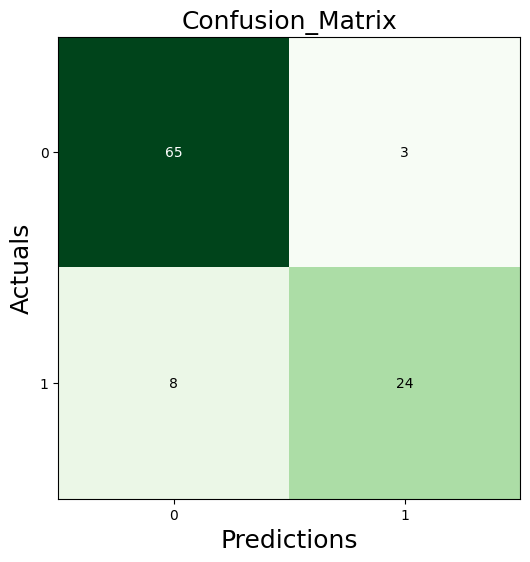

0.89

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm7 = confusion_matrix(y_test, y_pred)
print(cm7)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plot_confusion_matrix(conf_mat = cm7, figsize=(6,6),cmap = plt.cm.Greens)
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion_Matrix',fontsize=18)
plt.show()
logreg = accuracy_score(y_test,y_pred)
logreg

In [18]:
roc_auc_score(y_test,y_pred)

0.8529411764705883

In [19]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



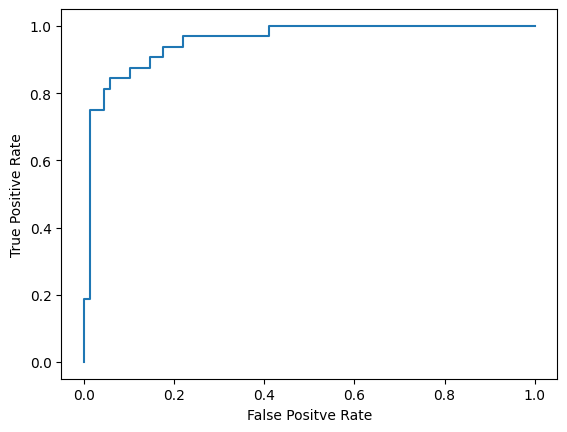

In [20]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict_proba(x_test)[:,1]
classifier.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positve Rate')
plt.show()